# **Proyecto práctico: Telecom X**

### **Explicación de los datos**

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o
mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

## **Importación de datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
archivo= pd.read_json('/content/TelecomX_Data.json')
archivo.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Explotamos las columnas que se encuentran anidadas en el dataFrame para que tomen una forma lineal y no hayan datos anidados

In [3]:
df = pd.json_normalize(
    archivo.to_dict(orient='records'),
    sep='_'
)

In [4]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

## **Tratamiento de los datos**

Cambiamos la columna 'account_Charges_Total' por un tipo float para poder hacer cálculos e interactuar con esta

In [6]:
df['account_Charges_Total'] = pd.to_numeric(
    df['account_Charges_Total']
    .astype(str)
    .str.replace('[^0-9\.]', '', regex=True),
    errors='coerce'
)

In [7]:
df['account_Charges_Total']= df['account_Charges_Total'].astype(float)

Eliminamos los valores nulos para proceder con el tratamiento de nuestro DataFrame

In [8]:
df= df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer_gender            7256 non-null   object 
 3   customer_SeniorCitizen     7256 non-null   int64  
 4   customer_Partner           7256 non-null   object 
 5   customer_Dependents        7256 non-null   object 
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

**Por medio de una mirada superficial por los datos llegamos a la conclusión de que las columnas que pueden tener mayor influencia son:**


*   customer_tenure(Meses de contrato del cliente)
*   Churn(Si abandonó o no)
*   account_contract(Tipo de contrato)
*   account_Charges_Monthly(Gasto mensual contando todos los servicios)
*   account_Charges_Total(Gasto total contando todos los servicios)
*   account_PaymentMethod(Método de pago)
*   internet_InternetService (Tipo de internet contratado)



**¿Por qué elegimos estas columnas?**

Porque nos dan la posibilidad de agrupar a los usuarios de distintas formas, como podría ser por tipo de internet, tipo de contrato, entre otras cosas, todo esto para tener insights significativos

No hay datos nulos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer_gender            7256 non-null   object 
 3   customer_SeniorCitizen     7256 non-null   int64  
 4   customer_Partner           7256 non-null   object 
 5   customer_Dependents        7256 non-null   object 
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

No hay datos duplicados

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Eliminamos las filas donde la columna Chung cuenta con un valor vacío

In [13]:
df=df[df['Churn'] != '']
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [14]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

### **Columnas que vamos a trabajar**

In [15]:
df_trabajar= df[['customer_tenure','Churn','account_Contract','internet_InternetService',
'account_PaymentMethod','account_Charges_Monthly', 'account_Charges_Total']]
df_trabajar.head()

,customer_tenure,Churn,account_Contract,internet_InternetService,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,9,No,One year,DSL,Mailed check,65.6,593.30
1,9,No,Month-to-month,DSL,Mailed check,59.9,542.40
2,4,Yes,Month-to-month,Fiber optic,Electronic check,73.9,280.85
3,13,Yes,Month-to-month,Fiber optic,Electronic check,98.0,1237.85
4,3,Yes,Month-to-month,Fiber optic,Mailed check,83.9,267.40


In [16]:
df_trabajar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_tenure           7032 non-null   int64  
 1   Churn                     7032 non-null   object 
 2   account_Contract          7032 non-null   object 
 3   internet_InternetService  7032 non-null   object 
 4   account_PaymentMethod     7032 non-null   object 
 5   account_Charges_Monthly   7032 non-null   float64
 6   account_Charges_Total     7032 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 439.5+ KB


Creamos una columna la cuál nos diga el gasto diario de cada usuario

In [17]:
df_trabajar['cuentas_diarias']= df['account_Charges_Monthly']/30
df_trabajar

/tmp/ipython-input-2455316492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trabajar['cuentas_diarias']= df['account_Charges_Monthly']/30


,customer_tenure,Churn,account_Contract,internet_InternetService,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,cuentas_diarias
0,9,No,One year,DSL,Mailed check,65.60,593.30,2.186667
1,9,No,Month-to-month,DSL,Mailed check,59.90,542.40,1.996667
2,4,Yes,Month-to-month,Fiber optic,Electronic check,73.90,280.85,2.463333
3,13,Yes,Month-to-month,Fiber optic,Electronic check,98.00,1237.85,3.266667
4,3,Yes,Month-to-month,Fiber optic,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...
7262,13,No,One year,DSL,Mailed check,55.15,742.90,1.838333
7263,22,Yes,Month-to-month,Fiber optic,Electronic check,85.10,1873.70,2.836667
7264,2,No,Month-to-month,DSL,Mailed check,50.30,92.75,1.676667
7265,67,No,Two year,DSL,Mailed check,67.85,4627.65,2.261667


## **Análisis Descriptivo**

In [18]:
df_trabajar.describe()

,customer_tenure,account_Charges_Monthly,account_Charges_Total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


## **Distribución de evasión**

In [19]:
df_trabajar_porcentajes= df['Churn'].value_counts()

In [20]:
df_trabajar_porcentajes= df_trabajar_porcentajes.div(df_trabajar_porcentajes.sum())*100

In [21]:
df_trabajar_porcentajes= pd.DataFrame(df_trabajar_porcentajes)

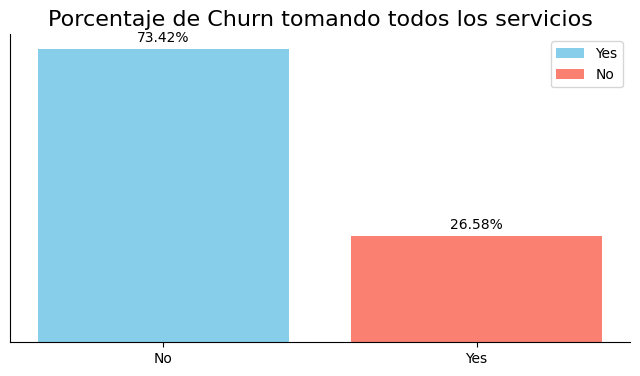

In [60]:
fig,ax= plt.subplots(figsize=(8,4))
ax.bar(df_trabajar_porcentajes.index, df_trabajar_porcentajes['count'])
ax.yaxis.set_visible(False)
bars = ax.bar(df_trabajar_porcentajes.index, df_trabajar_porcentajes['count'], color=['skyblue', 'salmon'], label=['Yes','No'])
ax.bar_label(bars, fmt='%.2f%%', label_type='edge', padding=3)
ax.set_title('Porcentaje de Churn tomando todos los servicios',fontsize=16)
ax.spines[['top','right']].set_visible(False)
ax.legend()
fig.savefig('/content/churn_servicios.png')
plt.show()

Creamos un DataFrame donde agrupamos por servicios de internet

In [23]:
df_internet = df_trabajar[['internet_InternetService','Churn']]

In [24]:
df_internet_agrupado= df_internet.groupby(['internet_InternetService','Churn']).size().unstack()

In [25]:
df_internet_agrupado

Churn,No,Yes
internet_InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [26]:
df_porcentajes_internet= df_internet_agrupado.div(df_internet_agrupado.sum(axis=1), axis=0)*100

In [27]:
df_porcentajes_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, DSL to No
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      3 non-null      float64
 1   Yes     3 non-null      float64
dtypes: float64(2)
memory usage: 72.0+ bytes


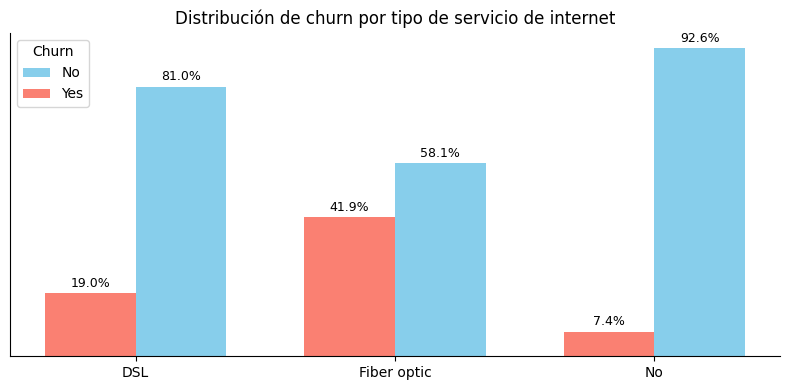

In [61]:
import numpy as np

x = np.arange(len(df_porcentajes_internet.index))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 4))

bar_no= ax.bar(x + width/2, df_porcentajes_internet['No'], width, label='No', color='skyblue')
bar_yes= ax.bar(x - width/2, df_porcentajes_internet['Yes'], width, label='Yes', color='salmon')

for bar in bar_yes:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,  # un poco arriba del borde
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

for bar in bar_no:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_xticks(x)
ax.set_xticklabels(df_porcentajes_internet.index)
ax.yaxis.set_visible(False)
ax.set_ylabel('Porcentaje')
ax.set_title('Distribución de churn por tipo de servicio de internet')
ax.spines[['top','right']].set_visible(False)
ax.legend(title='Churn')
fig.savefig('/content/churn_internet.png')
plt.tight_layout()

Ahora vamos a crear un DataFrame basado en la columna account_Contract

In [29]:
df_contract= df_trabajar[['account_Contract','Churn']]
df_contract

,account_Contract,Churn
0,One year,No
1,Month-to-month,No
2,Month-to-month,Yes
3,Month-to-month,Yes
4,Month-to-month,Yes
...,...,...
7262,One year,No
7263,Month-to-month,Yes
7264,Month-to-month,No
7265,Two year,No


In [30]:
df_contract= df_contract.groupby(['account_Contract','Churn']).size().unstack()

In [31]:
df_contract

Churn,No,Yes
account_Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [32]:
df_contract_porcentajes= df_contract.div(df_contract.sum(axis=1),axis=0)*100

In [33]:
df_contract_porcentajes

Churn,No,Yes
account_Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


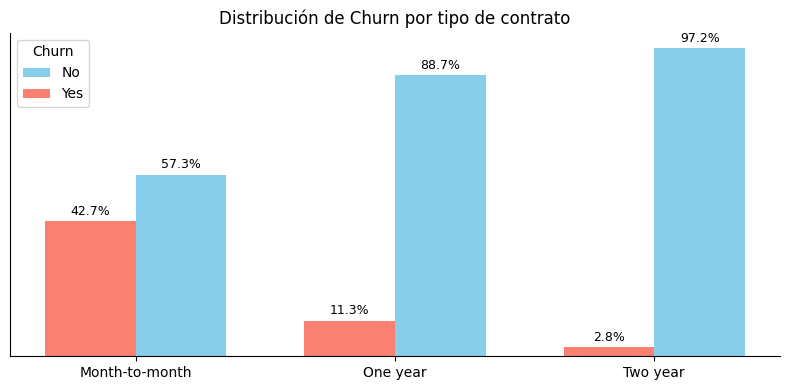

In [62]:
x = np.arange(len(df_contract_porcentajes.index))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 4))

bar_no= ax.bar(x + width/2, df_contract_porcentajes['No'], width, label='No', color='skyblue')
bar_yes= ax.bar(x - width/2, df_contract_porcentajes['Yes'], width, label='Yes', color='salmon')

for bar in bar_yes:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,  # un poco arriba del borde
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

for bar in bar_no:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_xticks(x)
ax.set_xticklabels(df_contract_porcentajes.index)
ax.yaxis.set_visible(False)
ax.set_ylabel('Porcentaje')
ax.set_title('Distribución de Churn por tipo de contrato')
ax.spines[['top','right']].set_visible(False)
ax.legend(title='Churn')
fig.savefig('/content/churn_contratos.png')
plt.tight_layout()

Ahora crearemos un DataFrame basado en el método de pago

In [35]:
df_metodo_pago= df_trabajar[['account_PaymentMethod','Churn']]
df_metodo_pago

,account_PaymentMethod,Churn
0,Mailed check,No
1,Mailed check,No
2,Electronic check,Yes
3,Electronic check,Yes
4,Mailed check,Yes
...,...,...
7262,Mailed check,No
7263,Electronic check,Yes
7264,Mailed check,No
7265,Mailed check,No


In [36]:
df_metodo_pago= df_metodo_pago.groupby(['account_PaymentMethod','Churn']).size().unstack()
df_metodo_pago

Churn,No,Yes
account_PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [37]:
df_metodo_pago_porcentajes= df_metodo_pago.div(df_metodo_pago.sum(axis=1),axis=0)*100
df_metodo_pago_porcentajes

Churn,No,Yes
account_PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


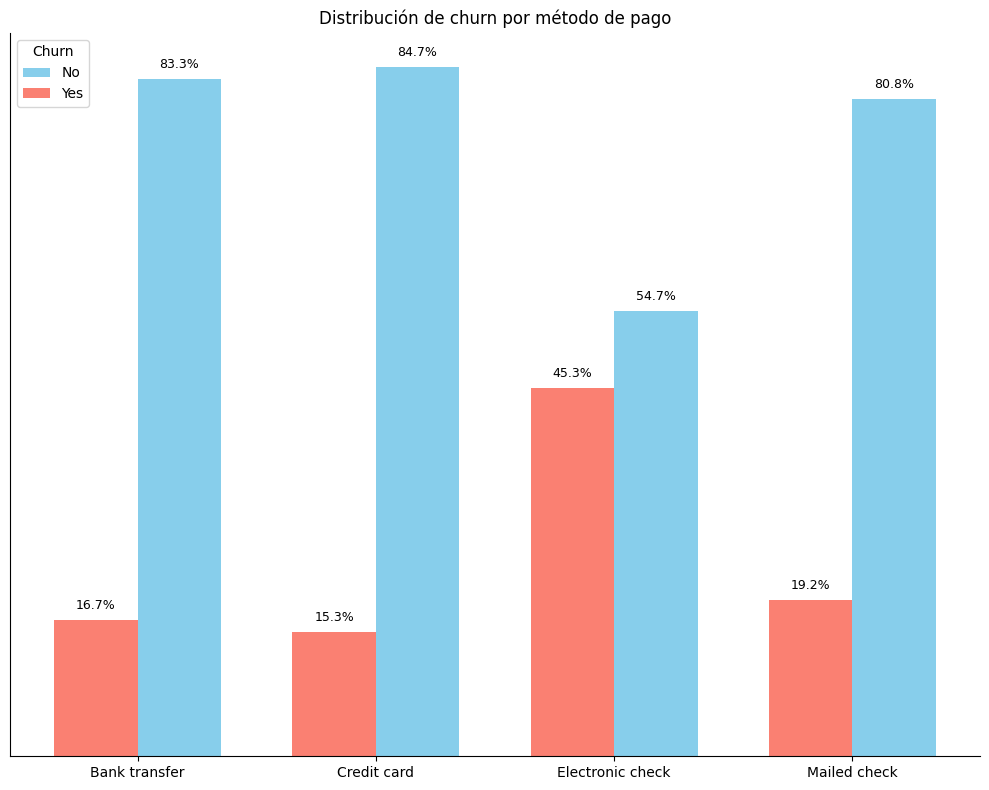

In [73]:
x = np.arange(len(df_metodo_pago_porcentajes.index))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))

bar_no= ax.bar(x + width/2, df_metodo_pago_porcentajes['No'], width, label='No', color='skyblue')
bar_yes= ax.bar(x - width/2, df_metodo_pago_porcentajes['Yes'], width, label='Yes', color='salmon')

for bar in bar_yes:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,  # un poco arriba del borde
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

for bar in bar_no:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_xticks(x)
ax.set_xticklabels(['Bank transfer','Credit card', 'Electronic check', 'Mailed check'])
ax.yaxis.set_visible(False)
ax.set_ylabel('Porcentaje')
ax.set_title('Distribución de churn por método de pago')
ax.spines[['top','right']].set_visible(False)
ax.legend(title='Churn')
fig.savefig('/content/churn_metodo_pago.png')
plt.tight_layout()

In [39]:
edad_churn= df[['customer_SeniorCitizen', 'Churn']]

In [40]:
edad_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_SeniorCitizen  7032 non-null   int64 
 1   Churn                   7032 non-null   object
dtypes: int64(1), object(1)
memory usage: 164.8+ KB


In [41]:
edad_churn_agrupada= edad_churn.groupby(['customer_SeniorCitizen','Churn']).size().unstack()
edad_churn_agrupada

Churn,No,Yes
customer_SeniorCitizen,,
0,4497,1393
1,666,476


In [42]:
edad_churn_porcentaje= edad_churn_agrupada.div(edad_churn_agrupada.sum(axis=1),axis=0)*100
edad_churn_porcentaje

Churn,No,Yes
customer_SeniorCitizen,,
0,76.349745,23.650255
1,58.318739,41.681261


In [43]:
type(edad_churn_porcentaje)

pandas.core.frame.DataFrame

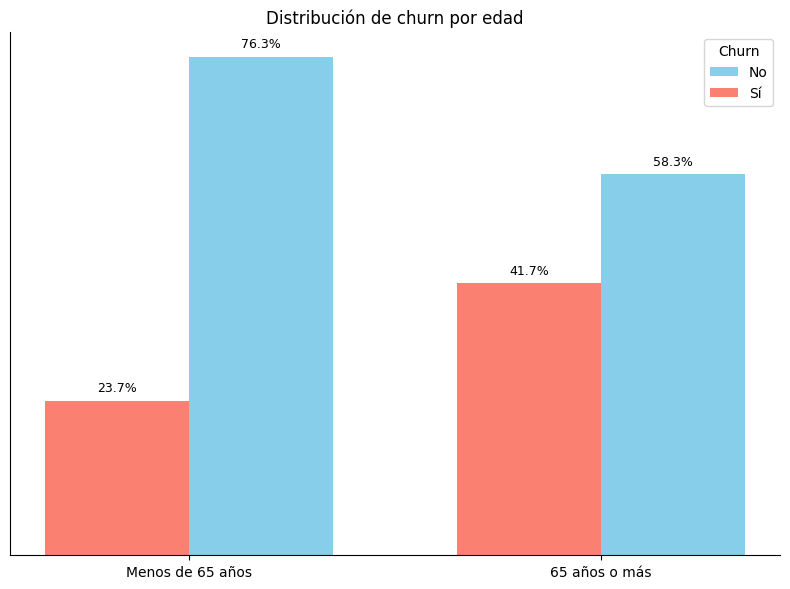

In [64]:
x = np.arange(len(edad_churn_porcentaje.index))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

bar_no= ax.bar(x + width/2, edad_churn_porcentaje['No'], width, label='No', color='skyblue')
bar_yes= ax.bar(x - width/2, edad_churn_porcentaje['Yes'], width, label='Sí', color='salmon')

for bar in bar_yes:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,  # un poco arriba del borde
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

for bar in bar_no:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_xticks(x)
ax.set_xticklabels(['Menos de 65 años', '65 años o más'])
ax.yaxis.set_visible(False)
ax.set_ylabel('Porcentaje')
ax.set_title('Distribución de churn por edad')
ax.spines[['top','right']].set_visible(False)
ax.legend(title='Churn')
fig.savefig('/content/churn_edad.png')
plt.tight_layout()

## **Conteo de evasión por variables numéricas**

In [45]:
df_columnas_numericas= df_trabajar[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'cuentas_diarias','Churn']]
df_columnas_numericas

,customer_tenure,account_Charges_Monthly,account_Charges_Total,cuentas_diarias,Churn
0,9,65.60,593.30,2.186667,No
1,9,59.90,542.40,1.996667,No
2,4,73.90,280.85,2.463333,Yes
3,13,98.00,1237.85,3.266667,Yes
4,3,83.90,267.40,2.796667,Yes
...,...,...,...,...,...
7262,13,55.15,742.90,1.838333,No
7263,22,85.10,1873.70,2.836667,Yes
7264,2,50.30,92.75,1.676667,No
7265,67,67.85,4627.65,2.261667,No


In [46]:
abandono_columnas_numericas= df_columnas_numericas.query('Churn == "Yes"')

In [47]:
retencion_columnas_numericas= df_columnas_numericas.query('Churn == "No"')

In [48]:
abandono_columnas_numericas['customer_tenure'].describe()

,customer_tenure
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000


In [49]:
round(float(abandono_columnas_numericas['customer_tenure'].mean()),2)

17.98

Mediana de los meses de contrato entre los que abandonaron

In [50]:
abandono_columnas_numericas['customer_tenure'].median()

10.0

In [51]:
retencion_columnas_numericas['customer_tenure'].describe()

,customer_tenure
count,5163.00000
mean,37.65001
std,24.07694
min,1.00000
25%,15.00000
50%,38.00000
75%,61.00000
max,72.00000


In [52]:
round(float(retencion_columnas_numericas['customer_tenure'].mean()),2)

37.65

Mediana de meses entre los que se quedaron

In [53]:
retencion_columnas_numericas['customer_tenure'].median()

38.0

Con esto podemos ver que las personas que abandonaron tenían un porcentaje de meses de contrato menor

In [54]:
abandono_columnas_numericas['cuentas_diarias'].describe()

,cuentas_diarias
count,1869.000000
mean,2.481378
std,0.822202
min,0.628333
25%,1.871667
50%,2.655000
75%,3.140000
max,3.945000


In [55]:
retencion_columnas_numericas['cuentas_diarias'].describe()

,cuentas_diarias
count,5163.000000
mean,2.043580
std,1.036485
min,0.608333
25%,0.836667
50%,2.148333
75%,2.949167
max,3.958333


En este caso podemos ver que este dato no marca una diferencia muy grande entre unos y otros

In [56]:
abandono_columnas_numericas['account_Charges_Monthly'].describe()

,account_Charges_Monthly
count,1869.000000
mean,74.441332
std,24.666053
min,18.850000
25%,56.150000
50%,79.650000
75%,94.200000
max,118.350000


In [57]:
retencion_columnas_numericas['account_Charges_Monthly'].describe()

,account_Charges_Monthly
count,5163.000000
mean,61.307408
std,31.094557
min,18.250000
25%,25.100000
50%,64.450000
75%,88.475000
max,118.750000


En este caso aunque notamos una diferencia no se considera que sea una notable

In [58]:
abandono_columnas_numericas['account_Charges_Total'].describe()

,account_Charges_Total
count,1869.000000
mean,1531.796094
std,1890.822994
min,18.850000
25%,134.500000
50%,703.550000
75%,2331.300000
max,8684.800000


In [59]:
retencion_columnas_numericas['account_Charges_Total'].describe()

,account_Charges_Total
count,5163.000000
mean,2555.344141
std,2329.456984
min,18.800000
25%,577.825000
50%,1683.600000
75%,4264.125000
max,8672.450000


En este caso vemos que las personas que tienden a tener menor gasto total casualmente son las que tienen mayor probabilidad de abandono del servicio.

Con esto podemos tener la suposición de que al tener menor gasto total es porque llevan menos tiempo con nuestra empresa, por ende puede ser un problema de enganche de nuestra empresa hacia nuestros clientes.

In [76]:
df_columnas_numericas.columns

Index(['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total',
       'cuentas_diarias', 'Churn'],
      dtype='object')

In [78]:
df_columnas_numericas[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total',
       'cuentas_diarias']].corr()

,customer_tenure,account_Charges_Monthly,account_Charges_Total,cuentas_diarias
customer_tenure,1.000000,0.246862,0.825880,0.246862
account_Charges_Monthly,0.246862,1.000000,0.651065,1.000000
account_Charges_Total,0.825880,0.651065,1.000000,0.651065
cuentas_diarias,0.246862,1.000000,0.651065,1.000000


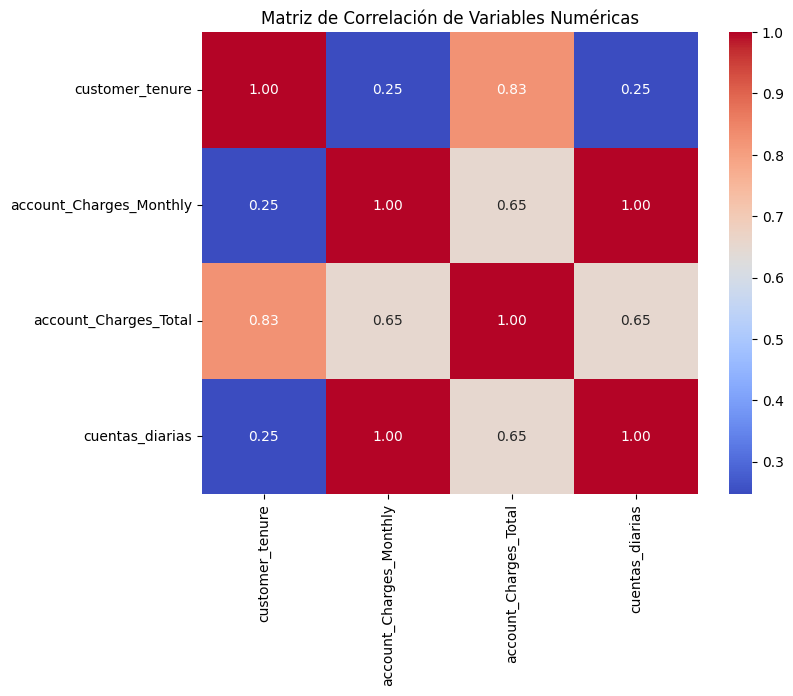

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_columnas_numericas[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total',
       'cuentas_diarias']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
fig.savefig('/content/matriz_correlacion_telecom.png')
plt.show()

# **Informe**
## **Introducción**
Este análisis se genera con el fin de identificar el por qué de la gran causa de evasión del servicio brindado por la compañía (Churn), esto con el fin de establecer estrategias y medidas para aumentar la tasa de retención de clientes.
## **Limpieza y tratamiento de datos**
*  Se importó el archivo el cuál consistía en un formato JSON, luego ,este contenía una estructura de diccionarios anidados. Para esto se uso el método pd.json_normalize con el fin de obtener todos los datos en un formato plano y sin datos anidados.
*  Se realizó un ajuste en cuánto al formato de las diferentes columnas brindadas, esto con el fin de poder trabajar de manera efectiva con estos datos.
*  La columna account_Charges_total se transformó de tipo object a float, lo cuál supuso hacer un replace más profundo ya que contenía valores que impedían la transformación de estos datos a un formato numérico.
*  Se trataron los valores nulos, en este caso se eliminaron ya que suponían una muy pequeña parte de los datos.
*  Se agregó una columna llamada 'cantidad_diaria', esta consistía en tomar la columna que contenía los gastos del mes y dividirlos por 30, lo cuál vendría siendo la cantidad de días, esto para obtener el valor que gastan diariamente nuestros clientes.
*  Se seleccionó un dataset más pequeño el cuál consistía en los datos que se considerarían más importantes para obtener insights.
## **Análisis Exploratorio de Datos**
*  Se llegó a la conclusión de que el 26.58% de los usuarios evadieron los servicios, aunque el porcentaje de usuarios que continuaron con el servicio es mayor, realmente es una cifra preocupante y que se debe analizar a más profundidad.
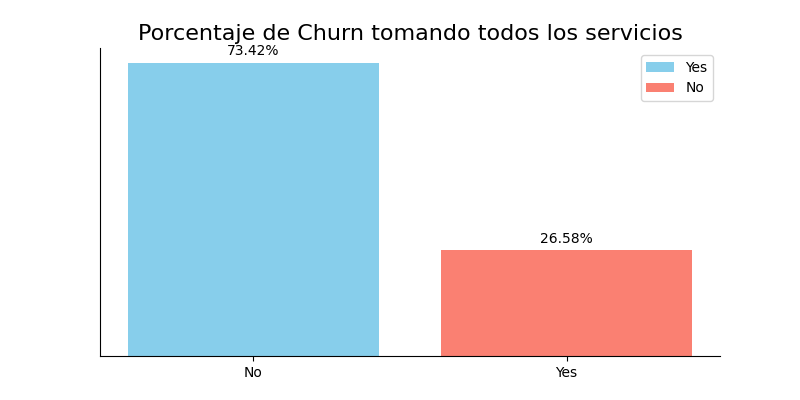
*  Se llegó a la conclusión de que la gente que termina evadiendo los servicios suele tener 65 años o más.
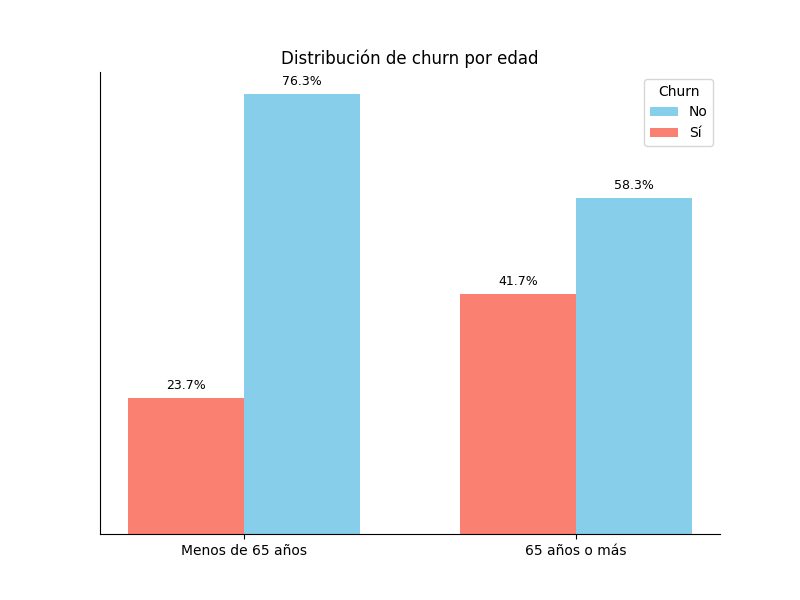
*  Se llegó a la conclusión de que los usuarios que cuentan con el servicio de fibra óptica tienden a ser los que más cometen Churn.
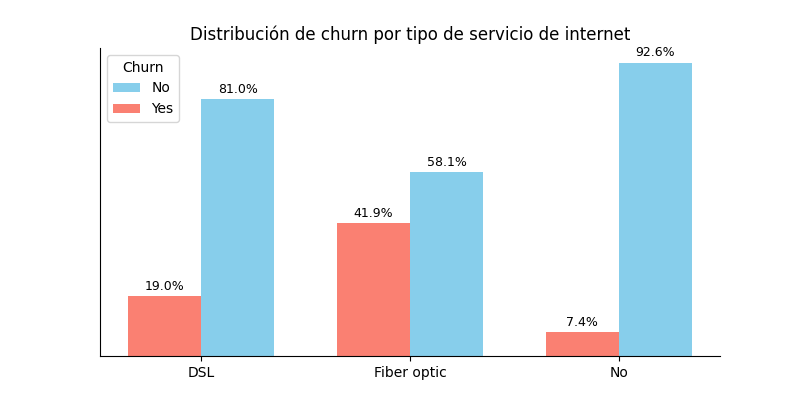
*  Basados en el tipo de contrato, los usuarios que cuentan con contratos mes a mes tienen un porcentaje mayor de abandono del servicio.

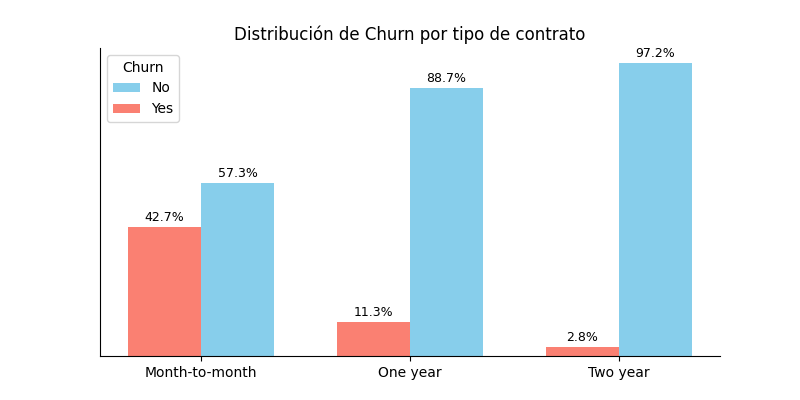
*  Basados en el método de pago, el porcentaje más alto de abandono del servicio pertenece a las personas que pagan por medio de factura eléctronica.

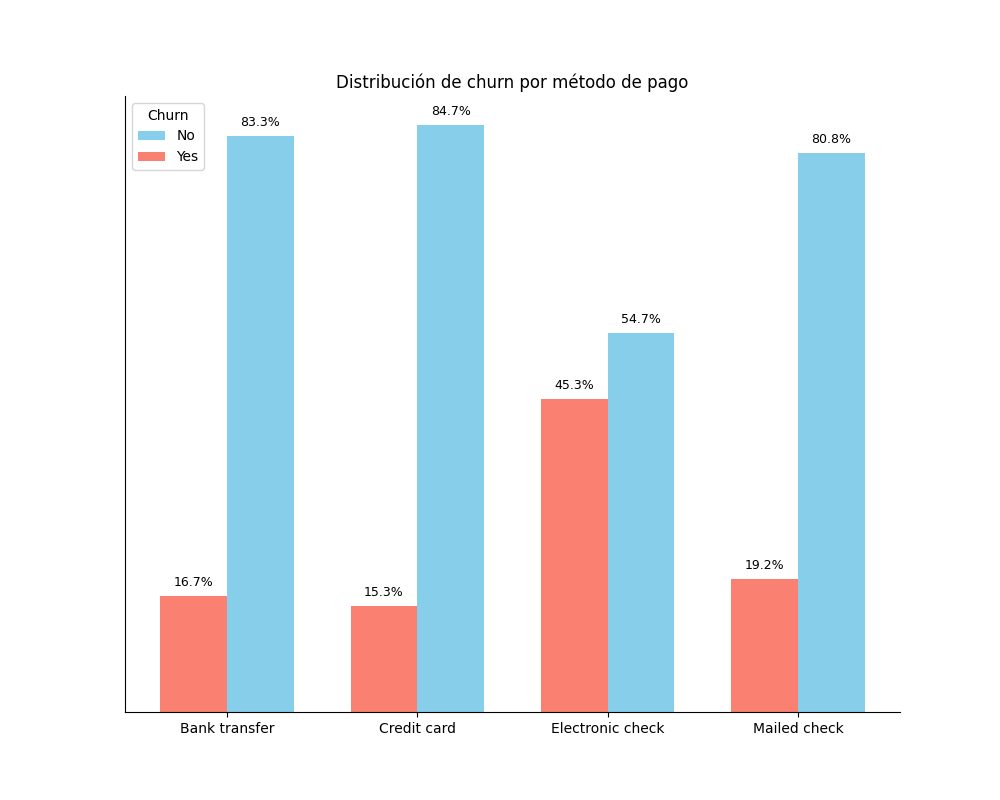

## **Conclusiones e insights**
*  Las personas mayores o iguales a 65 años tienden a abandonar el servicio, por ende se puede pensar que es una población que se tiene descuidada debido a la continua implementación de tecnología más avanzada y se han ido abandonado los servicios más antiguos, de los cuáles estas personas suelen ser las consumidoras.
*  Las personas que cuentan con servico de fibra óptica tienen una alta tendencia a abandonar el servicio, por lo cuál se debe realizar una evaluación donde se verifique la calidad de este servicio y si hay margen de mejora para este.
*  Las personas que tienen contrato mes a mes suelen abandonar con más frecuencia el servicio, por ende se pueden pensar en estrategias para su fidelización, como lo puede ser por ejemplo ofrecer descuentos pensados estrategicamente o empezar a promover de forma más activa los servicios anuales.
*  laspersonas que pagan por medio de factura electrónica abandonan más el servicio, se debe optar por la simplicidad en el proceso y evaluar si tal vez la falta de claridad en este puede ser una razón del abandono y, en caso de que así sea, ofrecer unas instrucciones más simples o una mejora en la metodología de pago.
## **Recomendaciones**
*  Empezar a dirigir servicios y campañas hacia los adultos mayores teniendo en cuenta los servicios más consumidos por esta población.
*  Verificar la calidad del servicio de internet ofrecido y pensar en hacer mejoras a la plataforma para que sea mucho más fácil el proceso de realizar pagos.
*  Pensar en estrategias de fidelización para los clientes que tienen contrato mes a mes y realizar una promoción activa de los contratos anuales.

## **Análisis de correlación entre la variable objetivo Churn y las variables númericas**

/tmp/ipython-input-1040501179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_columnas_numericas, x='Churn', y=col, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-1040501179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_columnas_numericas, x='Churn', y=col, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-1040501179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_columnas_numericas, x='Churn', y=col, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-1040501179.py:7: FutureWarning: 

Passing `palet

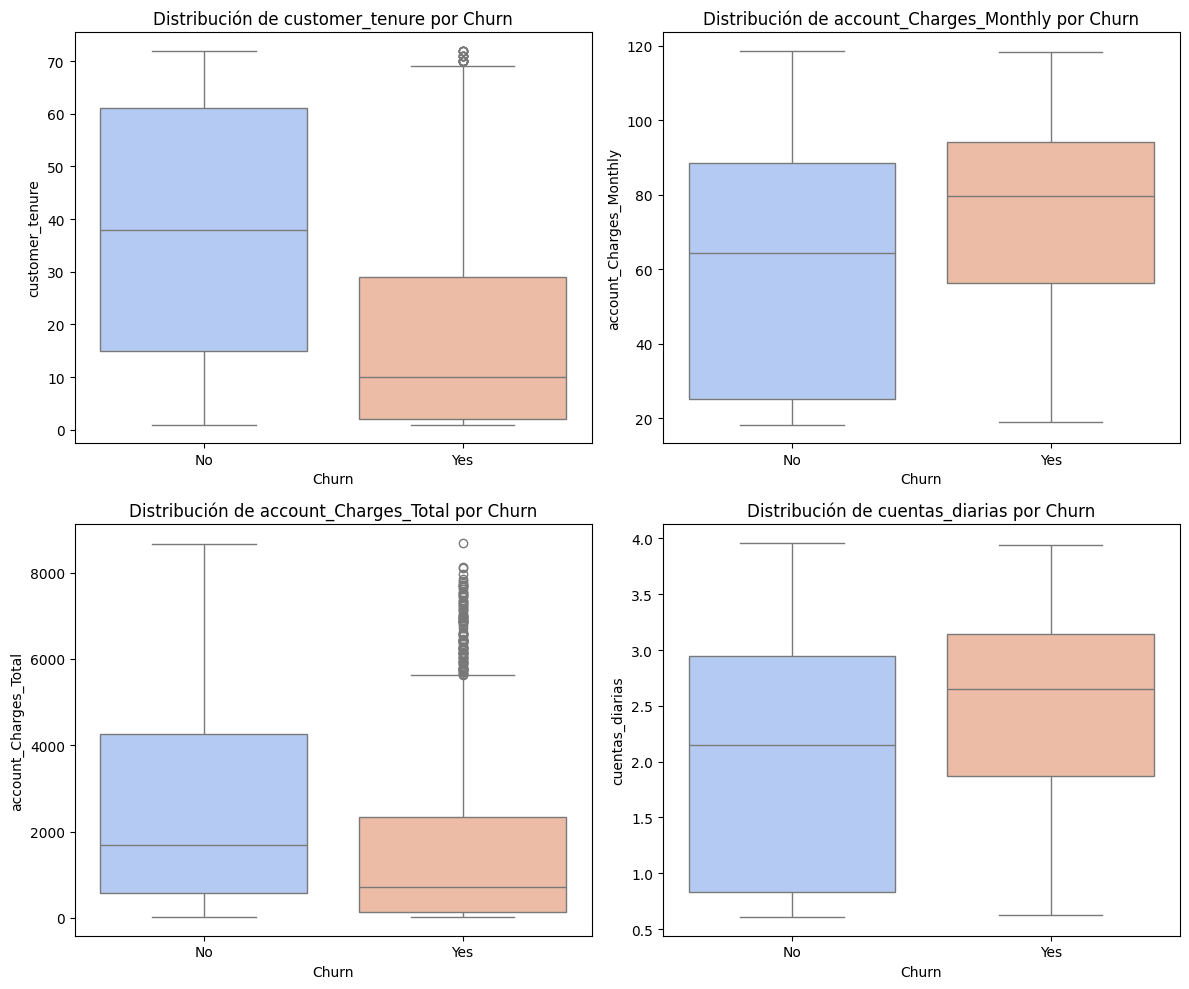

In [82]:
numerical_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'cuentas_diarias']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_columnas_numericas, x='Churn', y=col, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Distribución de {col} por Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
fig.savefig('/content/correlacion.png')
plt.tight_layout()
plt.show()